In [1]:
from labels_generator import Label_generator


import json
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import shutil

# from motion_refiner import Motion_refiner

import matplotlib.collections as mcoll
import matplotlib.path as mpath

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments


In [9]:
from motion_refiner import Motion_refiner

traj_n = 10
mr = Motion_refiner(traj_n = traj_n)

# ------- load data --------
X_, Y_ = mr.load_XY(x_name="X_delta_new_names",y_name="Y_delta_new_names")
data_ = mr.load_data(data_name="data_delta_new_names")
feature_indices, obj_sim_indices, obj_poses_indices, traj_indices = mr.get_indices()

ImportError: attempted relative import with no known parent package

In [ ]:
def generate_speed_change(traj, objs, n_labels=3):

    # objs[name] = {"value":{"obj_p":[x,y]}}


    show_animation = False

    grid_size = 3.0
    robot_radius = 1.0

    sx, sy= 10.0,10.0
    gx, gy= 90.0,90.0
    w, h = 100,100

    lg = Label_generator(objs,w=w,h=h)
    lg.generate_labels("speed")
    for text, map_cost_f in lg.sample_labels(n_labels):
        print(text)
        map_cost_f

for d in data_:

    # print(d)
    generate_speed_change(traj, objs)

    break

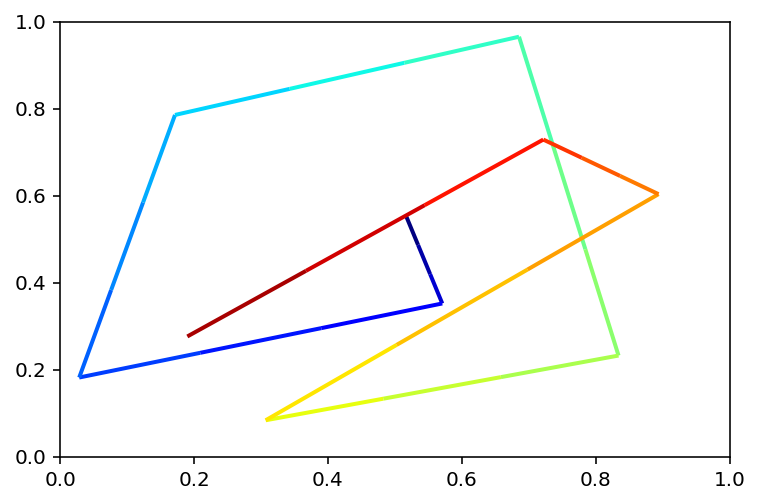

In [5]:


N = 10
np.random.seed(101)
x = np.random.rand(N)
y = np.random.rand(N)
# fig, ax = plt.subplots()

path = mpath.Path(np.column_stack([x, y]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(x))
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)

# plt.plot(x, y)
plt.show()
# traj_n = 10



# all_obj_names = ["table","chair","tree", "rock", "wall", "bycicle", "car", "computer", "cellphone", "TV"]
# obj_names = random.sample(all_obj_names, k = len(m["o_center_x"]))
# obj_x, obj_y = ([0.2,0.3,0.5],[0.4,0.7,0.4])
# objs  = {}
# for x,y,name in zip(obj_x, obj_y,obj_names):
#     objs[name] = {"value":{"obj_p":[x,y]}}
# print(objs)